In [72]:
import json
import pandas as pd
import C2Analyse
import C2Analyse as C2A
import matplotlib.pyplot as plt
import importlib
import re
import missingno as msno
importlib.reload(C2A)

pd.options.display.max_columns = None
verbose = 1
reload_data = 0

# Import the Data Files
This takes a while for large files.

In [22]:
if reload_data == 1:
    df_athletes = C2A.df.load_from_file("output/C2Athletes.json")
    df_athletes.index.set_names("profile_id", inplace=True)
    df_extended = C2A.df.load_from_file("output/C2Extended.json")
    df_extended.index.set_names("workout_id", inplace=True)
    df_workouts = C2A.df.load_from_file("output/C2Workouts.json")
    df_workouts.index.set_names("workout_id", inplace=True)

In [23]:
if verbose == 1:
    display(df_athletes)
    display(df_extended)
    display(df_workouts)

,name,availablity,age,country,location,team,height,weight,logbook id,member since,retrieved,affiliation,wingspan,website,email,adaptive rowing category,adaptive skiing category
profile_id,,,,,,,,,,,,,,,,,
1157105,Benjamin Smith,available,32,Australia,"Brisbane, QLD",Fusion Sport,6 ft 0 in,162 lb,1157105,"September 28, 2017",13-03-2021 12:24:37,NaN,NaN,NaN,NaN,NaN,NaN
1120032,Jasper Liu,available,26,United States,NaN,NaN,NaN,NaN,1120032,"December 30, 2016",13-03-2021 12:24:37,NaN,NaN,NaN,NaN,NaN,NaN
451524,Chris Gray,available,29,United States,"Raleigh, NC",Row House Raleigh Midtown,6 ft 4 in,190 lb,451524,"November 22, 2007",13-03-2021 12:24:38,University of North Carolina at Chapel Hill,NaN,NaN,NaN,NaN,NaN
1301914,Frederick Hancock,available,19,United Kingdom,NaN,Forum Flyers (since 2001),6 ft 2 in,163 lb,1301914,"December 04, 2019",13-03-2021 12:24:38,Forum Flyers,6 ft 5 in,NaN,NaN,NaN,NaN
1189208,Itai Almogy,available,19,United States,NaN,NaN,NaN,NaN,1189208,"March 08, 2018",13-03-2021 12:24:38,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250363,John Oney,available,23,United States,"Greenwich, OH",NaN,5 ft 10 in,177 lb,1250363,"February 08, 2019",14-03-2021 14:03:20,NaN,NaN,NaN,NaN,NaN,NaN
737313,Alan Aikens,available,54,United States,"Dorchester, MA",Cambridge Boat Club,NaN,238 lb,737313,"September 28, 2008",14-03-2021 14:03:20,Cambridge Boat Club,NaN,NaN,NaN,NaN,NaN
1210804,George Watts,available,41,United States,UT,NaN,5 ft 7 in,178 lb,1210804,"August 18, 2018",14-03-2021 14:03:23,NaN,NaN,NaN,NaN,NaN,NaN


,age,gender,weight class,country,verified,type,time,distance,pace,date,entered,retrieved,race,adaptive category
workout_id,,,,,,,,,,,,,,
45106891,18,Male,Lwt,United States,Yes,Indoor Rower,1:00.0,379m,1:19.1,"June 13, 2020",Web,13-03-2021 12:24:37,NaN,NaN
51182039,42,Male,Lwt,United States,Yes,Indoor Rower,1:00.0,366m,1:21.9,"February 02, 2021 18:15:00",ErgData iOS,13-03-2021 12:24:38,NaN,NaN
51157298,32,Male,Lwt,Australia,Yes,Indoor Rower,1:00.0,397m,1:15.5,"February 02, 2021 20:16:00",ErgData Android,13-03-2021 12:24:38,NaN,NaN
50803540,24,Male,Lwt,France,Yes,Indoor Rower,1:00.0,366m,1:21.9,"January 23, 2021 23:08:00",ErgData Android,13-03-2021 12:24:39,NaN,NaN
49949686,19,Male,Lwt,United Kingdom,Yes,Indoor Rower,1:00.0,389m,1:17.1,"January 02, 2021 19:28:00",ErgData iOS,13-03-2021 12:24:39,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34619955,55,Female,NaN,United Kingdom,No,BikeErg,8:22.0,"4,000m",2:05.5,"September 07, 2018 18:16:00",ErgData iOS,14-03-2021 14:03:42,NaN,NaN
34898628,52,Female,NaN,Norway,No,BikeErg,8:23.8,"4,000m",2:05.9,"September 30, 2018",Web,14-03-2021 14:03:42,NaN,NaN
35443299,22,Female,NaN,United States,No,BikeErg,8:24.9,"4,000m",2:06.2,"November 15, 2018",Web,14-03-2021 14:03:42,NaN,NaN


,pos.,name,age,location,country,club/affiliation,distance,verified,year,machine,event,retrieved,profile_id,rower,weight,gender,adaptive,category,time
workout_id,,,,,,,,,,,,,,,,,,,
51157298,1,Benjamin Smith,32,"Brisbane, QLD",AUS,None,397,Yes,2021,rower,1,13-03-2021 12:24:35,1157105,rower,L,M,NaN,NaN,NaN
49949686,2,Frederick Hancock,19,None,GBR,Forum Flyers,389,Yes,2021,rower,1,13-03-2021 12:24:35,1301914,rower,L,M,NaN,NaN,NaN
48271042,3,Jasper Liu,26,None,USA,None,386,Yes,2021,rower,1,13-03-2021 12:24:35,1120032,rower,L,M,NaN,NaN,NaN
45106891,4,Itai Almogy,18,None,USA,None,379,Yes,2021,rower,1,13-03-2021 12:24:35,1189208,rower,L,M,NaN,NaN,NaN
48223141,5,Chris Gray,29,"Raleigh, NC",USA,University of North Carolina at Chapel Hill,372,Yes,2021,rower,1,13-03-2021 12:24:35,451524,rower,L,M,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38060086,42,Steven Meador,63,"Hershey 🇺🇸, PA",USA,Washington University in St. Louis,NaN,Yes,2019,bikeerg,100000,14-03-2021 04:06:48,1060250,NaN,NaN,M,NaN,NaN,4:26:36.6
36865147,1,Kirsten Kline,30,"Houston, TX",USA,Engine by Carson (EBC),NaN,Yes,2019,bikeerg,100000,14-03-2021 04:06:50,1223199,NaN,NaN,F,NaN,NaN,3:20:23.4
34894246,2,Katrin Jüch,42,Pattensen,GER,Mobility3sixty,NaN,Yes,2019,bikeerg,100000,14-03-2021 04:06:50,1189710,NaN,NaN,F,NaN,NaN,4:11:31.8


# How Much Data?

In [24]:
print(f"Number of workouts: {len(df_workouts)}")
print(f"Number of athletes: {len(df_athletes)}")
print(f"Number of extended workout data: {len(df_extended)}")

# df_workouts_by_year_event = df_workouts[["event","year"]].value_counts().unstack(level=-1)
# df_workouts_by_year_event_plot = df_workouts_by_year_event.plot.bar(title="Workouts by Event")

Number of workouts: 331944
Number of athletes: 81027
Number of extended workout data: 331747


# Join the Datasets Together

Inner join

In [25]:
df_merge = C2A.df.merge(df_workouts, df_athletes, df_extended)

if verbose == 1:
    display(df_merge)

print(f"Number of merged rows: {len(df_merge)}")
print(f"{len(df_workouts)-len(df_merge)} missing rows.")

,pos.,name_x,age_x,location_x,country_x,club/affiliation,distance_x,verified_x,year,machine,event,retrieved_x,profile_id,rower,weight_x,gender_x,adaptive,category,time_x,name_y,availablity,age_y,country_y,location_y,team,height,weight_y,logbook id,member since,retrieved_y,affiliation,wingspan,website,email,adaptive rowing category,adaptive skiing category,age,gender_y,weight class,country,verified_y,type,time_y,distance_y,pace,date,entered,retrieved,race,adaptive category
workout_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51157298,1,Benjamin Smith,32,"Brisbane, QLD",AUS,None,397,Yes,2021,rower,1,13-03-2021 12:24:35,1157105,rower,L,M,NaN,NaN,NaN,Benjamin Smith,available,32,Australia,"Brisbane, QLD",Fusion Sport,6 ft 0 in,162 lb,1157105,"September 28, 2017",13-03-2021 12:24:37,NaN,NaN,NaN,NaN,NaN,NaN,32,Male,Lwt,Australia,Yes,Indoor Rower,1:00.0,397m,1:15.5,"February 02, 2021 20:16:00",ErgData Android,13-03-2021 12:24:38,NaN,NaN
52341234,1,Benjamin Smith,32,"Brisbane, QLD",AUS,None,394,Yes,2021,rower,1,13-03-2021 12:42:12,1157105,slides,L,M,NaN,NaN,NaN,Benjamin Smith,available,32,Australia,"Brisbane, QLD",Fusion Sport,6 ft 0 in,162 lb,1157105,"September 28, 2017",13-03-2021 12:24:37,NaN,NaN,NaN,NaN,NaN,NaN,32,Male,Lwt,Australia,Yes,Indoor Rower with Slides,1:00.0,394m,1:16.1,"March 09, 2021 15:50:00",ErgData Android,13-03-2021 13:13:05,NaN,NaN
52341240,1,Benjamin Smith,32,"Brisbane, QLD",AUS,None,NaN,Yes,2021,rower,100,13-03-2021 13:42:37,1157105,rower,L,M,NaN,NaN,0:13.7,Benjamin Smith,available,32,Australia,"Brisbane, QLD",Fusion Sport,6 ft 0 in,162 lb,1157105,"September 28, 2017",13-03-2021 12:24:37,NaN,NaN,NaN,NaN,NaN,NaN,32,Male,Lwt,Australia,Yes,Indoor Rower,0:13.7,100m,1:08.5,"March 02, 2021 11:09:00",ErgData Android,13-03-2021 15:08:10,NaN,NaN
52341235,1,Benjamin Smith,32,"Brisbane, QLD",AUS,None,NaN,Yes,2021,rower,100,13-03-2021 13:54:29,1157105,slides,L,M,NaN,NaN,0:13.4,Benjamin Smith,available,32,Australia,"Brisbane, QLD",Fusion Sport,6 ft 0 in,162 lb,1157105,"September 28, 2017",13-03-2021 12:24:37,NaN,NaN,NaN,NaN,NaN,NaN,32,Male,Lwt,Australia,Yes,Indoor Rower with Slides,0:13.4,100m,1:07.0,"March 09, 2021 15:22:00",ErgData Android,13-03-2021 15:28:31,NaN,NaN
52341315,1,Benjamin Smith,32,"Brisbane, QLD",AUS,None,NaN,Yes,2021,rower,500,13-03-2021 14:16:49,1157105,slides,L,M,NaN,NaN,1:18.2,Benjamin Smith,available,32,Australia,"Brisbane, QLD",Fusion Sport,6 ft 0 in,162 lb,1157105,"September 28, 2017",13-03-2021 12:24:37,NaN,NaN,NaN,NaN,NaN,NaN,32,Male,Lwt,Australia,Yes,Indoor Rower with Slides,1:18.2,500m,1:18.2,"March 09, 2021 16:23:00",ErgData Android,13-03-2021 16:12:54,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36932715,95,John Oney,21,"Greenwich, OH",USA,None,NaN,No,2019,bikeerg,4000,14-03-2021 04:06:21,1250363,NaN,NaN,M,NaN,NaN,7:25.3,John Oney,available,23,United States,"Greenwich, OH",NaN,5 ft 10 in,177 lb,1250363,"February 08, 2019",14-03-2021 14:03:20,NaN,NaN,NaN,NaN,NaN,NaN,21,Male,NaN,United States,No,BikeErg,7:25.3,"4,000m",1:51.3,"February 08, 2019",Web,14-03-2021 14:03:20,NaN,NaN
36678498,96,Alan Aikens,52,"Dorchester, MA",USA,Cambridge Boat Club,NaN,No,2019,bikeerg,4000,14-03-2021 04:06:21,737313,NaN,NaN,M,NaN,NaN,7:26.6,Alan Aikens,available,54,United States,"Dorchester, MA",Cambridge Boat Club,NaN,238 lb,737313,"September 28, 2008",14-03-2021 14:03:20,Cambridge Boat Club,NaN,NaN,NaN,NaN,NaN,52,Male,NaN,United States,No,BikeErg,7:26.6,"4,000m",1:51.6,"January 24, 2019",Web,14-03-2021 14:03:20,NaN,NaN
34481670,113,George Watts,38,UT,USA,None,NaN,Yes,2019,bikeerg,4000,14-03-2021 04:06:24,1210804,NaN,NaN,M,NaN,NaN,7:38.8,George Watts,available,41,United States,UT,NaN,5 ft 7 in,178 lb,1210804,"August 18, 2018",14-03-2021 14:03:23,NaN,NaN,NaN,NaN,NaN,NaN,38,Male,NaN,United States,Yes,BikeErg,7:38.8,"4,000m",1:54.7,"August 24, 2018 1

Number of merged rows: 308046
23898 missing rows.


# Clean Up the Columns

We now have lots of columns with some duplication and not very useful names from the merge.

irstly, in the merge columns that had the same name were suffixed with an x (workouts) or a y (extended) or with nothing (athletes). We can quickly change these to be a little more descriptive, then arrange them alphabetically to more easily see duplicates.

In [26]:
#raw_data = raw_data.rename(columns=lambda x: re.sub(' $','',x))

display(df_merge.info())

df_merge = df_merge.rename(columns=lambda x: re.sub('_x', '_w',x))
df_merge = df_merge.rename(columns=lambda x: re.sub('_y', '_e',x))
df_merge.sort_index(axis=1,inplace=True)

display(df_merge.info())

if verbose == 1:
    display(df_merge)


<class 'pandas.core.frame.DataFrame'>
Index: 308046 entries, 51157298 to 35512793
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   pos.                      308046 non-null  object 
 1   name_x                    308046 non-null  object 
 2   age_x                     308046 non-null  object 
 3   location_x                208284 non-null  object 
 4   country_x                 308046 non-null  object 
 5   club/affiliation          101460 non-null  object 
 6   distance_x                67427 non-null   object 
 7   verified_x                308046 non-null  object 
 8   year                      308046 non-null  int64  
 9   machine                   308046 non-null  object 
 10  event                     308046 non-null  int64  
 11  retrieved_x               308046 non-null  object 
 12  profile_id                308046 non-null  object 
 13  rower                     279769 non-nul

None

<class 'pandas.core.frame.DataFrame'>
Index: 308046 entries, 51157298 to 35512793
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   adaptive                  2075 non-null    object 
 1   adaptive category         2087 non-null    object 
 2   adaptive rowing category  1943 non-null    object 
 3   adaptive skiing category  440 non-null     object 
 4   affiliation               96420 non-null   object 
 5   age                       307853 non-null  object 
 6   age_e                     287271 non-null  object 
 7   age_w                     308046 non-null  object 
 8   availablity               308022 non-null  object 
 9   category                  2075 non-null    object 
 10  club/affiliation          101460 non-null  object 
 11  country                   307853 non-null  object 
 12  country_e                 287271 non-null  object 
 13  country_w                 308046 non-nul

None

,adaptive,adaptive category,adaptive rowing category,adaptive skiing category,affiliation,age,age_e,age_w,availablity,category,club/affiliation,country,country_e,country_w,date,distance_e,distance_w,email,entered,event,gender_e,gender_w,height,location_e,location_w,logbook id,machine,member since,name_e,name_w,pace,pos.,profile_id,race,retrieved,retrieved_e,retrieved_w,rower,team,time_e,time_w,type,verified_e,verified_w,website,weight class,weight_e,weight_w,wingspan,year
workout_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51157298,NaN,NaN,NaN,NaN,NaN,32,32,32,available,NaN,None,Australia,Australia,AUS,"February 02, 2021 20:16:00",397m,397,NaN,ErgData Android,1,Male,M,6 ft 0 in,"Brisbane, QLD","Brisbane, QLD",1157105,rower,"September 28, 2017",Benjamin Smith,Benjamin Smith,1:15.5,1,1157105,NaN,13-03-2021 12:24:38,13-03-2021 12:24:37,13-03-2021 12:24:35,rower,Fusion Sport,1:00.0,NaN,Indoor Rower,Yes,Yes,NaN,Lwt,162 lb,L,NaN,2021
52341234,NaN,NaN,NaN,NaN,NaN,32,32,32,available,NaN,None,Australia,Australia,AUS,"March 09, 2021 15:50:00",394m,394,NaN,ErgData Android,1,Male,M,6 ft 0 in,"Brisbane, QLD","Brisbane, QLD",1157105,rower,"September 28, 2017",Benjamin Smith,Benjamin Smith,1:16.1,1,1157105,NaN,13-03-2021 13:13:05,13-03-2021 12:24:37,13-03-2021 12:42:12,slides,Fusion Sport,1:00.0,NaN,Indoor Rower with Slides,Yes,Yes,NaN,Lwt,162 lb,L,NaN,2021
52341240,NaN,NaN,NaN,NaN,NaN,32,32,32,available,NaN,None,Australia,Australia,AUS,"March 02, 2021 11:09:00",100m,NaN,NaN,ErgData Android,100,Male,M,6 ft 0 in,"Brisbane, QLD","Brisbane, QLD",1157105,rower,"September 28, 2017",Benjamin Smith,Benjamin Smith,1:08.5,1,1157105,NaN,13-03-2021 15:08:10,13-03-2021 12:24:37,13-03-2021 13:42:37,rower,Fusion Sport,0:13.7,0:13.7,Indoor Rower,Yes,Yes,NaN,Lwt,162 lb,L,NaN,2021
52341235,NaN,NaN,NaN,NaN,NaN,32,32,32,available,NaN,None,Australia,Australia,AUS,"March 09, 2021 15:22:00",100m,NaN,NaN,ErgData Android,100,Male,M,6 ft 0 in,"Brisbane, QLD","Brisbane, QLD",1157105,rower,"September 28, 2017",Benjamin Smith,Benjamin Smith,1:07.0,1,1157105,NaN,13-03-2021 15:28:31,13-03-2021 12:24:37,13-03-2021 13:54:29,slides,Fusion Sport,0:13.4,0:13.4,Indoor Rower with Slides,Yes,Yes,NaN,Lwt,162 lb,L,NaN,2021
52341315,NaN,NaN,NaN,NaN,NaN,32,32,32,available,NaN,None,Australia,Australia,AUS,"March 09, 2021 16:23:00",500m,NaN,NaN,ErgData Android,500,Male,M,6 ft 0 in,"Brisbane, QLD","Brisbane, QLD",1157105,rower,"September 28, 2017",Benjamin Smith,Benjamin Smith,1:18.2,1,1157105,NaN,13-03-2021 16:12:54,13-03-2021 12:24:37,13-03-2021 14:16:49,slides,Fusion Sport,1:18.2,1:18.2,Indoor Rower with Slides,Yes,Yes,NaN,Lwt,162 lb,L,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36932715,NaN,NaN,NaN,NaN,NaN,21,23,21,available,NaN,None,United States,United States,USA,"February 08, 2019","4,000m",NaN,NaN,Web,4000,Male,M,5 ft 10 in,"Greenwich, OH","Greenwich, OH",1250363,bikeerg,"February 08, 2019",John Oney,John Oney,1:51.3,95,1250363,NaN,14-03-2021 14:03:20,14-03-2021 14:03:20,14-03-2021 04:06:21,NaN,NaN,7:25.3,7:25.3,BikeErg,No,No,NaN,NaN,177 lb,NaN,NaN,2019
36678498,NaN,NaN,NaN,NaN,Cambridge Boat Club,52,54,52,available,NaN,Cambridge Boat Club,United States,United States,USA,"January 24, 2019","4,000m",NaN,NaN,Web,4000,Male,M,NaN,"Dorchester, MA","Dorchester, MA",737313,bikeerg,"September 28, 2008",Alan Aikens,Alan Aikens,1:51.6,96,737313,NaN,14-03-2021 14:03:20,14-03-2021 14:03:20,14-03-2021 04:06:21,NaN,Cambridge Boat Club,7:26.6,7:26.6,BikeErg,No,No,NaN,NaN,238 lb,NaN,NaN,2019
34481670,NaN,NaN,NaN,NaN,NaN,38,41,38,available,NaN,None,United States,United States,USA,"August 24, 2018 10:36:00","4,000m",NaN,NaN,ErgData iOS,4000,Male,M,5 ft 7 in,UT,UT,1210804,bikeerg,"August 18, 2018",George Watts,George Watts,1:54.7,113,1210804,NaN,14-03-2021 14:03:24,14-03-2021 14:03:23,14-03-2021 04:06:24,NaN,NaN,7:38.8,7:

Some columns that look like duplicates aren't. For example, the age columns: one has the age of the athlete at the time of the workout, the other has the age of the athlete and the time the profile was retrieved.

Where columns are true duplicates, we will keep those with the most data.


In [27]:
columns_to_drop = ["age", "age_e", "country_e", "country", "distance_w", "gender_e", "location_e", "name_e", "time_w", "verified_e", "weight class", "affiliation"]
df_merge.drop(columns_to_drop, axis=1, inplace=True)

display(df_merge.info())

<class 'pandas.core.frame.DataFrame'>
Index: 308046 entries, 51157298 to 35512793
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   adaptive                  2075 non-null    object 
 1   adaptive category         2087 non-null    object 
 2   adaptive rowing category  1943 non-null    object 
 3   adaptive skiing category  440 non-null     object 
 4   age_w                     308046 non-null  object 
 5   availablity               308022 non-null  object 
 6   category                  2075 non-null    object 
 7   club/affiliation          101460 non-null  object 
 8   country_w                 308046 non-null  object 
 9   date                      307853 non-null  object 
 10  distance_e                307853 non-null  object 
 11  email                     0 non-null       float64
 12  entered                   307853 non-null  object 
 13  event                     308046 non-nul

None

Lastly, rename the columns with suffixes that are no longer duplicates and rename some columns to be more descriptive.

In [71]:
df_merge.rename(columns={"age_w":"age", "country_w":"country", "distance_e":"distance", "gender_w":"gender","location_w":"location", "name_w":"name", "time_e":"time", "verified_w":"verified", "weight_w":"weight_class", "weight_e":"weight", "adaptive":"adaptive (workout)", "adaptive category":"adaptive detail (workout)","adaptive rowing category":"adaptive rowing classification","adaptive skiing category":"adaptive skiing classification"}, inplace=True)

display(df_merge.info())

<class 'pandas.core.frame.DataFrame'>
Index: 308046 entries, 51157298 to 35512793
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   adaptive (workout)              2075 non-null    object 
 1   adaptive detail (workout)       2087 non-null    object 
 2   adaptive rowing classification  1943 non-null    object 
 3   adaptive skiing classification  440 non-null     object 
 4   age                             308046 non-null  object 
 5   availablity                     308022 non-null  object 
 6   category                        2075 non-null    object 
 7   club/affiliation                101460 non-null  object 
 8   country                         308046 non-null  object 
 9   date                            307853 non-null  object 
 10  distance                        307853 non-null  object 
 11  email                           0 non-null       float64
 12  entered     

None

# Missing Data

Why are there less rows in the merged data than there are workouts?

Did we fail to get some athlete or extended workout profiles?

In [210]:
print(f"Number of workout: {len(df_workouts)}")
print(f"Number of merged rows: {len(df_merge)}")
print(f"{len(df_workouts)-len(df_merge)} missing rows.")

Number of workout: 331944
Number of merged rows: 308046
23898 missing rows.


We can check by performing an outer join and finding empty athlete profile and extended workout values.

In [211]:
df_merge_outer = C2A.df.merge(df_workouts, df_athletes, df_extended, how="outer")

print(f"Number of merged rows: {len(df_merge_outer)}")

Number of merged rows: 331944


This now matches the length of the workouts data frame, so we are missing some data.

Can use the "retrieved" columns to see where we are missing data from.

## Extended Workout

In [212]:
df_missing_extended = df_merge_outer["retrieved"].isnull()

display(df_missing_extended.value_counts())

False    331543
True        401
Name: retrieved, dtype: int64

In [213]:
df_merge_outer[df_missing_extended]

,pos.,name_x,age_x,location_x,country_x,club/affiliation,distance_x,verified_x,year,machine,event,retrieved_x,profile_id,rower,weight_x,gender_x,adaptive,category,time_x,name_y,availablity,age_y,country_y,location_y,team,height,weight_y,logbook id,member since,retrieved_y,affiliation,wingspan,website,email,adaptive rowing category,adaptive skiing category,age,gender_y,weight class,country,verified_y,type,time_y,distance_y,pace,date,entered,retrieved,race,adaptive category
workout_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35936408,26,Claudius B.,39,Weiden i.d.Opf.,GER,Free Spirits,NaN,No,2019,bikeerg,40000,14-03-2021 04:06:39,1081739,,,M,,NaN,1:14:44.4,Claudius B.,training partner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13-03-2021 12:25:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213037,2588,Michael Schatt,58,None,GER,SG FÖRDE SPARKASSE KIEL e.V.,12010,Race,2020,rower,60,13-03-2021 19:27:57,None,rower,H,M,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None
201620,280,Alexandra Coorey,15,None,AUS,None,NaN,Race,2020,rower,100,13-03-2021 19:43:35,None,rower,H,F,,NaN,0:22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None
212712,1447,Ansgar Heinze,46,None,GER,Lufthansa Sportverein Hamburg e.V.,NaN,Race,2020,rower,500,13-03-2021 19:58:42,None,rower,H,M,,NaN,1:32.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None
210169,2799,Gianluca Gladden -sg,14,None,GBR,Alcester Grammer,NaN,Race,2020,rower,500,13-03-2021 20:00:54,None,rower,H,M,,NaN,1:39.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35175879,76,Morten Nordhammer Sæther,31,None,NOR,None,NaN,Yes,2019,bikeerg,40000,14-03-2021 04:06:42,1209843,,,M,,NaN,1:24:37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34434295,87,Daniel Temple,26,None,GBR,None,NaN,No,2019,bikeerg,40000,14-03-2021 04:06:42,1209721,,,M,,NaN,1:27:36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35741626,101,Ian Edwards,59,None,GBR,None,NaN,No,2019,bikeerg,40000,14-03-2021 04:06:44,1223957,,,M,,NaN,1:33:36.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Athlete

In [214]:
df_missing_athlete = df_merge_outer["retrieved_y"].isnull()

display(df_missing_athlete.value_counts())

False    308210
True      23734
Name: retrieved_y, dtype: int64

This accounts for almost all the missing data. There has been some sort of problem retrieving some profiles, we'll need to look into this further in the scraping code, but for now we discard these (by using the inner merged data as they make up a small proportion of the dataset

In [215]:
df_merge_outer[df_missing_athlete]

,pos.,name_x,age_x,location_x,country_x,club/affiliation,distance_x,verified_x,year,machine,event,retrieved_x,profile_id,rower,weight_x,gender_x,adaptive,category,time_x,name_y,availablity,age_y,country_y,location_y,team,height,weight_y,logbook id,member since,retrieved_y,affiliation,wingspan,website,email,adaptive rowing category,adaptive skiing category,age,gender_y,weight class,country,verified_y,type,time_y,distance_y,pace,date,entered,retrieved,race,adaptive category
workout_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
218426,62,Liam Deighton,29,Bokarina,AUS,None,341,Race,2021,rower,1,13-03-2021 12:24:41,None,rower,L,M,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Male,Lwt,Australia,NaN,Indoor Rower,1:00.0,341,1:27.9,"October 11, 2020",Race Result,13-03-2021 12:25:09,Queensland IRC,NaN
218436,97,Harry Pettett,16,Bokarina,AUS,None,334,Race,2021,rower,1,13-03-2021 12:24:46,None,rower,L,M,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Male,Lwt,Australia,NaN,Indoor Rower,1:00.0,334,1:29.8,"October 11, 2020",Race Result,13-03-2021 12:25:28,Queensland IRC,NaN
218407,129,Rob Cossalter,67,Bokarina,AUS,None,330,Race,2021,rower,1,13-03-2021 12:24:46,None,rower,L,M,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,Male,Lwt,Australia,NaN,Indoor Rower,1:00.0,330,1:30.9,"October 11, 2020",Race Result,13-03-2021 12:25:41,Queensland IRC,NaN
218390,179,Rob Flood,59,Bokarina,AUS,None,325,Race,2021,rower,1,13-03-2021 12:24:50,None,rower,L,M,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,Male,Lwt,Australia,NaN,Indoor Rower,1:00.0,325,1:32.3,"October 11, 2020",Race Result,13-03-2021 12:26:07,Queensland IRC,NaN
218678,201,Matt Nelson,16,Bokarina,AUS,None,323,Race,2021,rower,1,13-03-2021 12:24:55,None,rower,L,M,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Male,Lwt,Australia,NaN,Indoor Rower,1:00.0,323,1:32.8,"October 11, 2020",Race Result,13-03-2021 12:26:17,Queensland IRC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35175879,76,Morten Nordhammer Sæther,31,None,NOR,None,NaN,Yes,2019,bikeerg,40000,14-03-2021 04:06:42,1209843,,,M,,NaN,1:24:37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34434295,87,Daniel Temple,26,None,GBR,None,NaN,No,2019,bikeerg,40000,14-03-2021 04:06:42,1209721,,,M,,NaN,1:27:36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35741626,101,Ian Edwards,59,None,GBR,None,NaN,No,2019,bikeerg,40000,14-03-2021 04:06:44,1223957,,,M,,NaN,1:33:36.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
df_aw_count = df_athletes_workouts["profile_id"].value_counts()

bins = df_aw_count[0].max() #set bin size to 1
df_aw_count_plot = df_aw_count.plot(kind="hist", bins=bins, title="Workouts per Athlete")

NameError: name 'df_athletes_workouts' is not defined

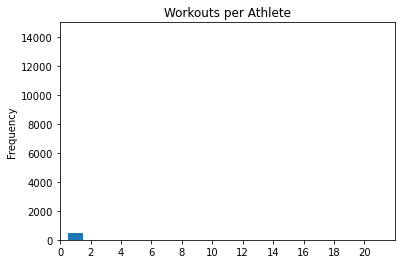

In [9]:
ymax = 15000
xmax = 22
num_ticks = 10
xticks=range(0,xmax,int(round(xmax/num_ticks,0)))
df_aw_count_plot = df_aw_count.plot(kind="hist", bins=bins, title="Workouts per Athlete", ylim=[0,ymax], xlim=[0,xmax], xticks=xticks)

#i actually want the below as an accumalative total of all the bars to the right (so I can look at e.g. 4, and see all the athletes with 4 or more activities) create a running total in the df with the sum of all values including and below this row

In [10]:
# plot country: import pycountry
# use %population